# Doubly Linked List (DLL) in Python
This notebook demonstrates the implementation of a **Doubly Linked List** in Python.
A Doubly Linked List is a data structure where each node contains:
- `value`: the data
- `next`: pointer to the next node
- `prev`: pointer to the previous node


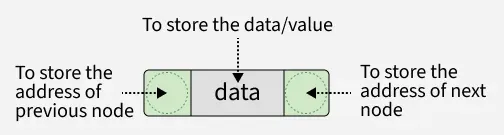

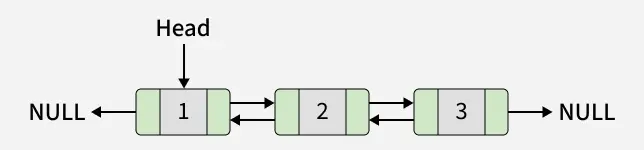

In [ ]:
# Node class for Doubly Linked List
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
        self.prev = None
    def __str__(self):
        return str(self.value)    

## Explanation:
- `Node` class represents each element in the DLL.
- `value`: stores the data.
- `next`: points to the next node in the list.
- `prev`: points to the previous node.
- `__str__` method returns the value as a string for printing.


# Str

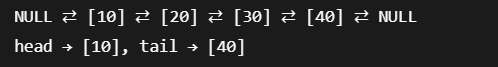

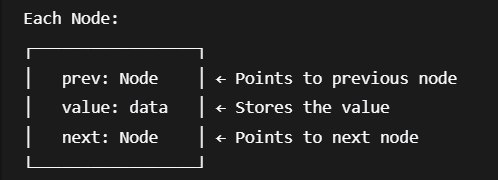

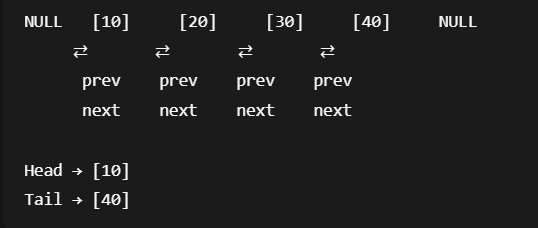

| Iteration | temp_node    | temp_node.value | temp_node.next | result (before)                  | result (after)                     | Add " <-> "? |
|-----------|--------------|-----------------|----------------|----------------------------------|------------------------------------|--------------|
| 1         | [10]         | 10              | [20]           | ""                               | "10"                               | ✅ Yes       |
| 2         | [20]         | 20              | [30]           | "10 <-> "                        | "10 <-> 20"                        | ✅ Yes       |
| 3         | [30]         | 30              | [40]           | "10 <-> 20 <-> "                 | "10 <-> 20 <-> 30"                 | ✅ Yes       |
| 4         | [40]         | 40              | NULL           | "10 <-> 20 <-> 30 <-> "          | "10 <-> 20 <-> 30 <-> 40"          | ❌ No        |


In [70]:
# Doubly Linked List class
class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

    def __str__(self):
        temp_node = self.head 
        result = ''
        while temp_node:
            result += str(temp_node.value) 
            if temp_node.next: 
                result +='<->' 
            temp_node = temp_node.next 
        return result    
    

### Explanation:
- `head`: points to the first node.
- `tail`: points to the last node.
- `length`: tracks the number of nodes in the list.
- `__str__`: prints the list in `value1 <-> value2 <-> value3` format.


# Append

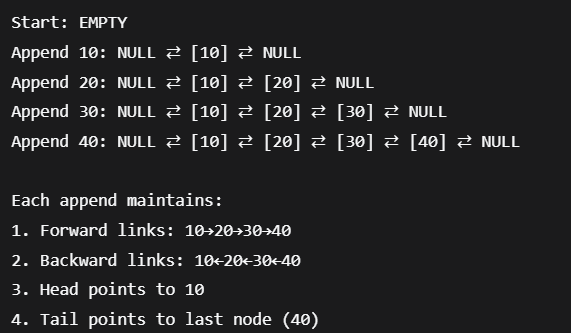

10<=>20<=>30


| Step | Operation                       | head     | tail     | new_node | tail.next         | new_node.prev     | Action                                           |
|------|----------------------------------|----------|----------|----------|--------------------|--------------------|--------------------------------------------------|
| 1    | Create new_node(30)              | [10]     | [20]     | [30]     | -                  | -                  | Node created                                     |
| 2    | head is not None                 | [10]     | [20]     | [30]     | -                  | -                  | Skip empty case                                  |
| 3    | tail.next = new_node             | [10]     | [20]     | [30]     | [20] → [30]        | -                  | Link old tail → new node                         |
| 4    | new_node.prev = tail             | [10]     | [20]     | [30]     | [20] → [30]        | [30].prev = [20]   | Link new node back to old tail                   |
| 5    | tail = new_node                  | [10]     | [30]     | [30]     | [20] → [30]        | [30].prev = [20]   | Update tail pointer                              |
| 6    | length += 1                      | length=3 |          |          |                    |                    | Increment length                                 |


In [72]:
# Append and Prepend Methods
def append(self, value):
    new_node = Node(value) #30
    if not self.head:
        self.head = new_node
        self.tail = new_node
    else: 
        self.tail.next = new_node #20.next =30
        new_node.prev = self.tail #30.prev = 20
        self.tail = new_node  #30   

DoublyLinkedList.append = append  
dll = DoublyLinkedList()
dll.append(10)
dll.append(20)
dll.append(30)

print("DLL:", dll)     

DLL: 10<->20<->30


# Prepend
20 <-> 30  
Now prepend(10)  

| Step | Line of Code                  | new_node | head(before) | Linked List After Step |
|------|-------------------------------|----------|---------------|-------------------------|
| 1    | Create new_node(10)           | [10]     | [20]          | 20 ⇄ 30                |
| 2    | new_node.next = self.head     | [10]→[20]| [20]          | 10 → 20 ⇄ 30           |
| 3    | self.head.prev = new_node     | [10]⇄[20]| [20]          | 10 ⇄ 20 ⇄ 30           |
| 4    | self.head = new_node          | head=[10]| [20]          | **10 ⇄ 20 ⇄ 30**       |
| 5    | self.length += 1              | [10]     | [10]          | **10 ⇄ 20 ⇄ 30**       |

Resulting list:
10 <-> 20 <-> 30

10<->20 <-> 30  


In [74]:
def prepend(self, value):
    new_node = Node(value) #10
    if not self.head:
        self.head = new_node
        self.tail = new_node
    else: 
        new_node.next =self.head #10.next = 20
        self.head.prev = new_node 
        self.head = new_node #10
    self.length +=1    
DoublyLinkedList.prepend = prepend
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.prepend(55)

print("DLL:", dll)     


DLL: 55<->44<->5


### Explanation:
- **append(value)**: Adds a node at the end.
  - If empty, `head` and `tail` point to the new node.
  - Otherwise, adjust pointers (`tail.next` and `new_node.prev`) and update `tail`.
- **prepend(value)**: Adds a node at the start.
  - If empty, `head` and `tail` point to the new node.
  - Otherwise, adjust pointers (`head.prev` and `new_node.next`) and update `head`.


# Traverse and Reverse Traverse


10 ⇄ 20 ⇄ 30 ⇄ 40

| Step | current_node        | current_node.value | Printed Output (so far) | Linked List Visualization      |
|------|----------------------|---------------------|--------------------------|--------------------------------|
| 1    | [10]                 | 10                  | "10 "                    | 10 ⇄ 20 ⇄ 30 ⇄ 40              |
| 2    | [20]                 | 20                  | "10 20 "                 | 10 ⇄ 20 ⇄ 30 ⇄ 40              |
| 3    | [30]                 | 30                  | "10 20 30 "              | 10 ⇄ 20 ⇄ 30 ⇄ 40              |
| 4    | [40]                 | 40                  | "10 20 30 40 "           | 10 ⇄ 20 ⇄ 30 ⇄ 40              |
| 5    | None                 | -                   | Final Output: "10 20 30 40" | END                           |


In [78]:
# Traverse and Reverse Traverse
def traverse(self):
    current_node =  self.head #10
    while current_node:
        print(current_node.value, end = ' ') #"10 20 30 40"
        current_node = current_node.next #20,30,40
    print()    
DoublyLinkedList.traverse = traverse
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
dll.traverse()                  # Traverse forward
print("DLL:", dll)              # Prints full list



44 5 10 
DLL: 44<->5<->10


# reverse_traverse

10 ⇄ 20 ⇄ 30 ⇄ 40

| Step | current_node        | current_node.value | Printed Output (so far) | Linked List (Reverse Direction) |
|------|----------------------|---------------------|---------------------------|----------------------------------|
| 1    | [40] (tail)          | 40                  | "40 "                     | 40 ⇐ 30 ⇐ 20 ⇐ 10                |
| 2    | [30]                 | 30                  | "40 30 "                  | 40 ⇐ 30 ⇐ 20 ⇐ 10                |
| 3    | [20]                 | 20                  | "40 30 20 "               | 40 ⇐ 30 ⇐ 20 ⇐ 10                |
| 4    | [10]                 | 10                  | "40 30 20 10 "            | 40 ⇐ 30 ⇐ 20 ⇐ 10                |
| 5    | None                 | -                   | Final Output: "40 30 20 10" | END                             |


In [82]:
def reverse_traverse(self):
    current_node = self.tail #40
    while current_node:
        print(current_node.value, end=' ') #"40 30 20 10"
        current_node = current_node.prev #30, 20, 10, None
    print()
DoublyLinkedList.reverse_traverse = reverse_traverse
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
print("DLL:", dll)              # Prints full list
dll.traverse()                  # Traverse forward
dll.reverse_traverse()          # Traverse backward


DLL: 44<->5<->10
44 5 10 
10 5 44 


### Explanation:
- **traverse()**: Moves from head to tail, printing each value.
- **reverse_traverse()**: Moves from tail to head, printing each value.


# Search, Get, and Set Value

## search

10 ⇄ 20 ⇄ 30 ⇄ 40   
Search for target = 30

| Step | current_node        | current_node.value | index | value == target? | Action / Result      |
|------|----------------------|---------------------|-------|-------------------|------------------------|
| 1    | [10] (head)          | 10                  | 0     | 10 == 30? ❌       | Move to next node      |
| 2    | [20]                 | 20                  | 1     | 20 == 30? ❌       | Move to next node      |
| 3    | [30]                 | 30                  | 2     | 30 == 30? ✅       | RETURN 2               |


In [87]:
# Search, Get, and Set Value
def search(self, target):
    current_node = self.head #10
    index = 0
    while current_node:
        if current_node.value == target:
            return index #2
        current_node = current_node.next #20,30
        index +=1
    return -1    
DoublyLinkedList.search = search
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
print("DLL:", dll)              # Prints full list
print("Search 5:", dll.search(5))

DLL: 44<->5<->10
Search 5: 1


## get

Index: 0    1    2    3    4  
Values:10 ⇄ 20 ⇄ 30 ⇄ 40 ⇄ 50  
length = 5  


Case 1: get(1)   
Since 1 < length//2 = 2, it uses forward traversal.  

| Step | index | Condition Check | current_node | Movement | Comment |
|------|--------|------------------|---------------|-----------|----------|
| 1    | 1      | 1 < 2 → TRUE     | head = [10]   | Start     | Begin at head |
| 2    | loop 1 | Move next        | [20]          | next      | Now at index 1 |
| END  | Return | —                | [20]          | —         | Node found |

✔ Output node = 20


🎯 Case 2: get(4)

Since 4 < 2 is FALSE → use backward traversal starting from tail.

| Step | index | Condition Check | current_node | Loop Range | Movement | Comment |
|------|--------|------------------|---------------|--------------|-----------|----------|
| 1    | 4      | 4 < 2 → FALSE    | tail = [50]   | range(4,4,-1) | Start | Start at tail |
| 2    | loop 1 | Move prev        | [50]          | NO LOOP      | No movement | Already at index 4 |
| END  | Return | —                | [50]          | —            | Node found |

✔ Output node = 50

Case 3: get(3)

Since 3 < 2 is FALSE → backward traversal.  
| Step | current | Loop Counter | Movement | Node Value |
|------|----------|----------------|-----------|-------------|
| 1    | tail     | from 4→3       | prev      | 40          |
| END  | return   | —              | —         | 40          |

O/p =40


In [106]:
def get(self, index):
    if index < 0 or index >= self.length:
        return None
    if index < self.length//2: # 1<5//2=T
        current_node = self.head #10
        for _ in range(index): #1
            current_node = current_node.next #20
    else:
        current_node = self.tail  #50
        for _ in range(self.length-1, index, -1):  #range(4, 4 , -1)
            current_node = current_node.prev  #40    
    return current_node        


DoublyLinkedList.get = get
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.prepend(10)
print("DLL:", dll)              # Prints full list                # Traverse forward
# dll.set_value(1, 55)
# print("After set_value:", dll)
print(dll.get(2))


DLL: 10<->44<->5
5


## Set

Assume DLL:

Index: 0    1    2    3  
Values:10 ⇄ 20 ⇄ 30 ⇄ 40   
Call:  
dll.set_value(2, 99)

| Step | Operation                         | Explanation                                      | Node Returned by get() | List State (After Step)                |
|------|------------------------------------|--------------------------------------------------|--------------------------|----------------------------------------|
| 1    | node = self.get(2)                | Calls get() to fetch node at index 2 (value=30) | [30]                     | 10 ⇄ 20 ⇄ 30 ⇄ 40                      |
| 2    | if node:                          | Node exists → True                               | [30]                     | 10 ⇄ 20 ⇄ 30 ⇄ 40                      |
| 3    | node.value = 99                   | Updates node's value                              | [99]                     | 10 ⇄ 20 ⇄ 99 ⇄ 40                      |
| 4    | return True                       | Operation successful                              | —                        | 10 ⇄ 20 ⇄ 99 ⇄ 40                      |


In [112]:
def set_value(self , index, value):
    node = self.get(index) #2
    if node:
        node.value = value #30= 99
        return True
    return False
DoublyLinkedList.set_value =  set_value
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.prepend(10)
#dll.insert(1, 99)

print("DLL:", dll)              # Prints full list
#dll.traverse()                  # Traverse forward
#dll.reverse_traverse()          # Traverse backward
#print("Search 99:", dll.search(99))
dll.set_value(1, 100)
print("After set_value:", dll)

DLL: 10<->44<->5
After set_value: 10<->100<->5


### Explanation:
- **search(target)**: Returns index of the first node with value `target`, else -1.
- **get(index)**: Returns the node at `index`. Optimized to traverse from head or tail depending on index.
- **set_value(index, value)**: Sets node's value at `index` to `value`. Returns True if successful.


# Insert, Pop, Remove, Delete All


# insert

For: insert(2, 99)

List: 10 ⇄ 20 ⇄ 30 ⇄ 40

| Step | Code Line                     | What Happens?                                   | Pointer Values                     | List State                                   |
|------|-------------------------------|--------------------------------------------------|-------------------------------------|-----------------------------------------------|
| 1    | new_node = Node(99)           | Create a new node with value 99                 | new_node → (99)                    | 10 ⇄ 20 ⇄ 30 ⇄ 40                             |
| 2    | temp_node = get(1)            | index-1 = 1 → temp_node = node(20)             | temp_node → (20)                   | 10 ⇄ 20 ⇄ 30 ⇄ 40                             |
| 3    | new_node.next = temp.next     | new_node.next now points to node(30)            | new_node.next → (30)               | 10 ⇄ 20 ⇄ [99].next = 30 ⇄ 40                 |
| 4    | new_node.prev = temp_node     | new_node.prev now points to node(20)            | new_node.prev → (20)               | 10 ⇄ 20 ⇄ 99 ⇄ 30 ⇄ 40                        |
| 5    | temp.next.prev = new_node     | 30.prev updated to point to new_node (99)       | 30.prev → (99)                     | 10 ⇄ 20 ⇄ 99 ⇄ 30 ⇄ 40                        |
| 6    | temp_node.next = new_node     | 20.next updated to point to new_node (99)       | 20.next → (99)                     | 10 ⇄ 20 ⇄ **99** ⇄ 30 ⇄ 40                    |
| 7    | length += 1                   | Increase DLL length                              | length = 5                         | 10 ⇄ 20 ⇄ **99** ⇄ 30 ⇄ 40                    |


10 ⇄ 20 ⇄ 99 ⇄ 30 ⇄ 40


In [124]:
def insert(self, index, value):
    if index <0 or index > self.length:
        print("Error : index out of bounds,")
        return
    if index == 0:
        self.prepend(value)
        return
    elif index == self.length:
        self.append(value)
        return
    #middle
    new_node = Node(value) #99
    temp_node = self.get(index-1)#get(1)=20
    new_node.next = temp_node.next#99.next =30
   
    new_node.prev = temp_node #99.prev = 20
    temp_node.next.prev = new_node
    temp_node.next = new_node
    self.length +=1

# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
dll.insert(1, 99)
print("DLL:", dll)              # Prints full list

DLL: 44<->99<->5<->10


# pop_first

10 ⇄ 20 ⇄ 30 ⇄ 40

| Step | Code Line                       | What Happens?                                     | Pointer Values                           | List State After Step                         |
|------|----------------------------------|----------------------------------------------------|--------------------------------------------|-----------------------------------------------|
| 1    | if not self.head                 | List is not empty → continue                       | head → 10                                  | 10 ⇄ 20 ⇄ 30 ⇄ 40                             |
| 2    | popped_node = self.head          | Store node(10) to return later                     | popped_node → (10)                         | 10 ⇄ 20 ⇄ 30 ⇄ 40                             |
| 3    | if self.length == 1              | Length = 4 → skip                                  | —                                          | 10 ⇄ 20 ⇄ 30 ⇄ 40                             |
| 4    | self.head = self.head.next       | Move head to node(20)                              | head → (20)                                | 20 ⇄ 30 ⇄ 40                                  |
| 5    | self.head.prev = None            | Remove backward link from new head                 | 20.prev → None                              | 20 ⇄ 30 ⇄ 40                                  |
| 6    | popped_node.next = None          | Detach popped node                                 | popped_node.next → None                    | (10)    20 ⇄ 30 ⇄ 40                          |
| 7    | self.length -= 1                 | Reduce list size from 4 → 3                        | length = 3                                  | 20 ⇄ 30 ⇄ 40                                  |
| 8    | return popped_node               | Returns node(10)                                   | returned → (10)                             | 20 ⇄ 30 ⇄ 40                                  |


20 ⇄ 30 ⇄ 40


In [129]:
def pop_first(self):
    if not self.head:
        return None
    popped_node = self.head #10
    if self.length == 1: 
        self.head = None
        self.tail = None
    else:
        self.head = self.head.next  #20  
        self.head.prev = None
        popped_node.next = None
    self.length -= 1
    return popped_node    
DoublyLinkedList.pop_first = pop_first
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
dll.insert(1, 99)
print("DLL:", dll)              # Prints full list
dll.pop_first()
print("After pops and remove:", dll)

DLL: 44<->99<->5<->10
After pops and remove: 99<->5<->10


# pop

10 ⇄ 20 ⇄ 30 ⇄ 40  ,  Tail = 40 

| Step | Code Line                      | What Happens?                                           | Pointer Values                          | List State After Step                        |
|------|--------------------------------|----------------------------------------------------------|-------------------------------------------|----------------------------------------------|
| 1    | if not self.tail               | List is not empty → continue                             | tail → (40)                               | 10 ⇄ 20 ⇄ 30 ⇄ 40                            |
| 2    | popped_node = self.tail        | Store last node (40) to return later                     | popped_node → (40)                        | 10 ⇄ 20 ⇄ 30 ⇄ 40                            |
| 3    | if length == 1                 | Length = 4 → skip                                        | —                                         | 10 ⇄ 20 ⇄ 30 ⇄ 40                            |
| 4    | self.tail = self.tail.prev     | Move


In [132]:
def pop(self):
    if not self.tail:
        return None
    popped_node = self.tail #40
    if self.length == 1: 
        self.head = None
        self.tail = None
    else:
        self.tail = self.tail.prev  #30
        self.tail.next = None
        popped_node.prev = None
    self.length -= 1
    return popped_node    


DoublyLinkedList.pop = pop
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
print("DLL:", dll)              # Prints full list
dll.pop()
print("After pops and remove:", dll)


DLL: 44<->5<->10
After pops and remove: 44<->5


# Remove

List:
10 ⇄ 20 ⇄ 30 ⇄ 40 ⇄ 50   
Length = 5, We remove index 2 → value 30   

| Step | Code Line                                 | What Happens?                                              | Pointer Values                          | List State After Step                               |
|------|--------------------------------------------|-------------------------------------------------------------|-------------------------------------------|------------------------------------------------------|
| 1    | if index < 0 or index >= length            | index = 2 is valid → continue                               | —                                         | 10 ⇄ 20 ⇄ 30 ⇄ 40 ⇄ 50                               |
| 2    | if index == 0                              | index ≠ 0 → skip                                            | —                                         | same                                                 |
| 3    | if index == length-1                       | 2 ≠ 4 → skip                                                | —                                         | same                                                 |
| 4    | popped_node = get(index)                   | get(2) → node(30)                                           | popped_node → (30)                        | 10 ⇄ 20 ⇄ *30* ⇄ 40 ⇄ 50                             |
| 5    | popped_node.prev.next = popped_node.next   | 20.next = 40 (skip 30)                                      | 20.next → (40)                            | 10 ⇄ 20 ⇄ 40 ⇄ 50                                    |
| 6    | popped_node.next.prev = popped_node.prev   | 40.prev = 20 (skip 30)                                      | 40.prev → (20)                            | 10 ⇄ 20 ⇄ 40 ⇄ 50                                    |
| 7    | popped_node.prev = None                    | Remove left pointer of popped node                          | popped_node.prev → None                   | 10 ⇄ 20 ⇄ 40 ⇄ 50                                    |
| 8    | popped_node.next = None                    | Remove right pointer of popped node                         | popped_node.next → None                   | 10 ⇄ 20 ⇄ 40 ⇄ 50                                    |
| 9    | length -= 1                                | length = 4                                                  | length = 4                                | 10 ⇄ 20 ⇄ 40 ⇄ 50                                    |
| 10   | return popped_node                         | Return removed node (30)                                    | returns (30)                              | Final list: **10 ⇄ 20 ⇄ 40 ⇄**_


In [140]:
def remove(self, index):
    if index < 0 or index >= self.length:
        return None
    if index == 0:
        return self.pop_first()
    if index == self.length-1:
        return self.pop()
    popped_node = self.get(index) #30
    popped_node.prev.next = popped_node.next
    #20.next = 40
    #10 ⇄ 20 ⇄ 40 ⇄ 50   
    popped_node.next.prev = popped_node.prev
    #40.prev = 20
    popped_node.prev =None
    popped_node.next =None
    self.length -= 1
    return popped_node
DoublyLinkedList.remove = remove
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.prepend(10)

print("DLL:", dll)              # Prints full list
dll.remove(1)
print("After pops and remove:", dll)

DLL: 10<->44<->5
After pops and remove: 10<->5


# Delete

In [141]:

def delete_all(self):
    self.head = None
    self.tail = None
    self.length =0
    

DoublyLinkedList.delete_all = delete_all
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
dll.insert(1, 99)

print("DLL:", dll)              # Prints full list
dll.traverse()                  # Traverse forward
dll.reverse_traverse()          # Traverse backward
print("Search 99:", dll.search(99))
dll.set_value(1, 55)
print("After set_value:", dll)
dll.pop_first()
dll.pop()
dll.remove(1)
print("After pops and remove:", dll)
dll.delete_all()
print("After delete_all:", dll)



DLL: 44<->99<->5<->10
44 99 5 10 
10 5 99 44 
Search 99: 1
After set_value: 44<->99<->55<->10
After pops and remove: 99<->55
After delete_all: 


### Explanation:
- **insert(index, value)**: Inserts a node at a specific index.
- **pop_first()**: Removes and returns the first node.
- **pop()**: Removes and returns the last node.
- **remove(index)**: Removes a node at a specific index.
- **delete_all()**: Clears the entire list.


In [142]:
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
dll.insert(1, 99)

print("DLL:", dll)              # Prints full list
dll.traverse()                  # Traverse forward
dll.reverse_traverse()          # Traverse backward
print("Search 99:", dll.search(99))
dll.set_value(1, 55)
print("After set_value:", dll)
dll.pop_first()
dll.pop()
dll.remove(1)
print("After pops and remove:", dll)
dll.delete_all()
print("After delete_all:", dll)


DLL: 44<->99<->5<->10
44 99 5 10 
10 5 99 44 
Search 99: 1
After set_value: 44<->99<->55<->10
After pops and remove: 99<->55
After delete_all: 
